/var/folders/fq/v7_rbrr11ys3zyrg_w9v2_n40000gn/T/ipykernel_15430/2377825113.py:12: UserWarning: The markers list has more values (8) than needed (4), which may not be intended.
  em_scat = sns.scatterplot(


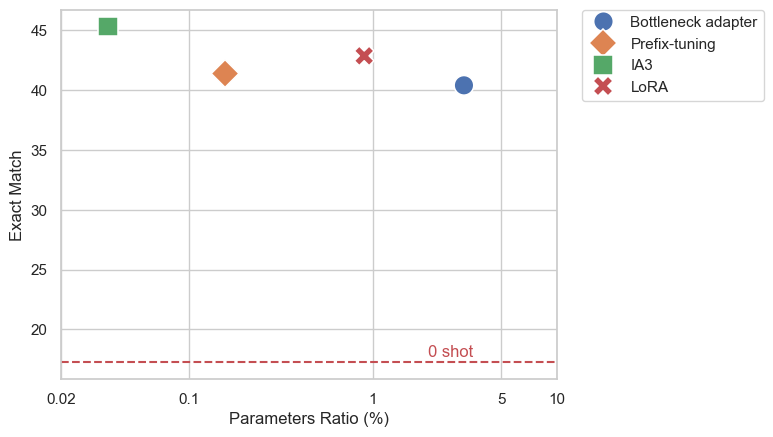

/var/folders/fq/v7_rbrr11ys3zyrg_w9v2_n40000gn/T/ipykernel_15430/2377825113.py:33: UserWarning: The markers list has more values (8) than needed (4), which may not be intended.
  f1_scat = sns.scatterplot(


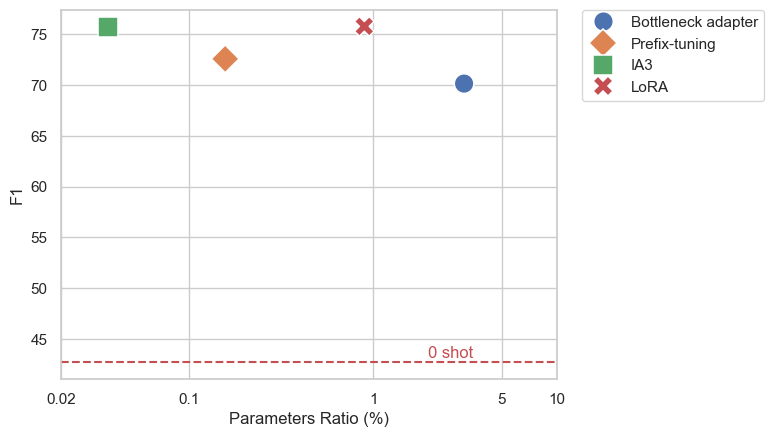

/var/folders/fq/v7_rbrr11ys3zyrg_w9v2_n40000gn/T/ipykernel_15430/2377825113.py:54: UserWarning: The markers list has more values (8) than needed (4), which may not be intended.
  f1_scat = sns.scatterplot(


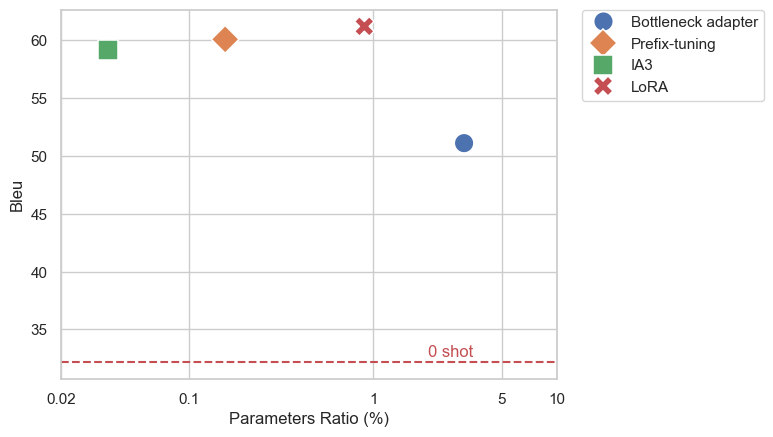

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read data from analysis-result.csv
df = pd.read_csv("analysis-result.csv")

markers = ["s", "X", "D", "o", "^", "P", "p", "h"]

sns.set_theme(style="whitegrid")

em_scat = sns.scatterplot(
    x="param_ratio",
    y="em",
    hue="method",
    hue_order=["Bottleneck adapter", "Prefix-tuning", "IA3", "LoRA"],
    data=df[0 : len(df) - 1],
    s=200,
    style=df[0 : len(df) - 1]["method"],
    markers=markers,
)
em_scat.set(xlabel="Parameters Ratio (%)", ylabel="Exact Match")
plt.axhline(
    y=df.iloc[len(df) - 1]["em"], color="r", linestyle="dashed", label="_nolegend_"
)
plt.text(2, df.iloc[len(df) - 1]["em"] + 0.5, "0 shot", color="r")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.xscale("log")
plt.xticks([0.02, 0.1, 1, 5, 10], [0.02, 0.1, 1, 5, 10])
plt.show()
em_scat.figure.savefig("./figs/em.png", bbox_inches="tight")

f1_scat = sns.scatterplot(
    x="param_ratio",
    y="f1",
    hue="method",
    hue_order=["Bottleneck adapter", "Prefix-tuning", "IA3", "LoRA"],
    data=df[0 : len(df) - 1],
    s=200,
    style=df[0 : len(df) - 1]["method"],
    markers=markers,
)
f1_scat.set(xlabel="Parameters Ratio (%)", ylabel="F1")
plt.axhline(
    y=df.iloc[len(df) - 1]["f1"], color="r", linestyle="dashed", label="_nolegend_"
)
plt.text(2, df.iloc[len(df) - 1]["f1"] + 0.5, "0 shot", color="r")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.xscale("log")
plt.xticks([0.02, 0.1, 1, 5, 10], [0.02, 0.1, 1, 5, 10])
plt.show()
f1_scat.figure.savefig("./figs/f1.png", bbox_inches="tight")

f1_scat = sns.scatterplot(
    x="param_ratio",
    y="bleu",
    hue="method",
    hue_order=["Bottleneck adapter", "Prefix-tuning", "IA3", "LoRA"],
    data=df[0 : len(df) - 1],
    s=200,
    style=df[0 : len(df) - 1]["method"],
    markers=markers,
)
f1_scat.set(xlabel="Parameters Ratio (%)", ylabel="Bleu")
plt.axhline(
    y=df.iloc[len(df) - 1]["bleu"], color="r", linestyle="dashed", label="_nolegend_"
)
plt.text(2, df.iloc[len(df) - 1]["bleu"] + 0.5, "0 shot", color="r")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
plt.xscale("log")
plt.xticks([0.02, 0.1, 1, 5, 10], [0.02, 0.1, 1, 5, 10])
plt.show()
f1_scat.figure.savefig("./figs/bleu.png", bbox_inches="tight")

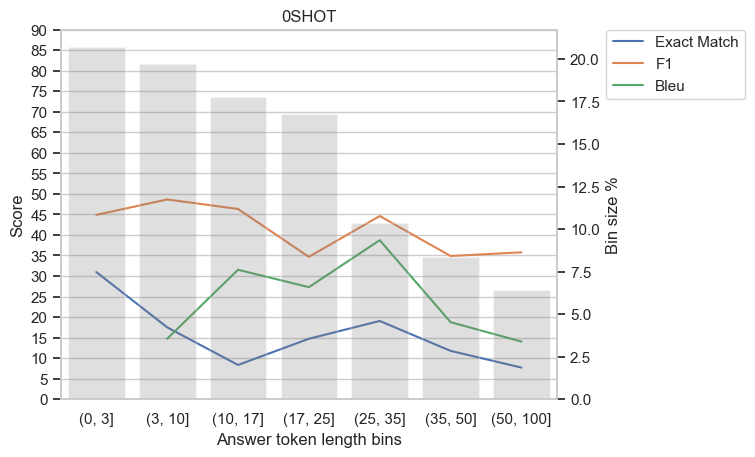

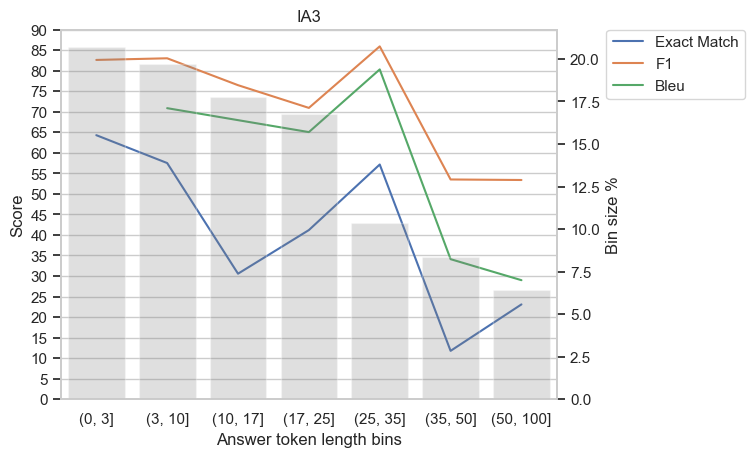

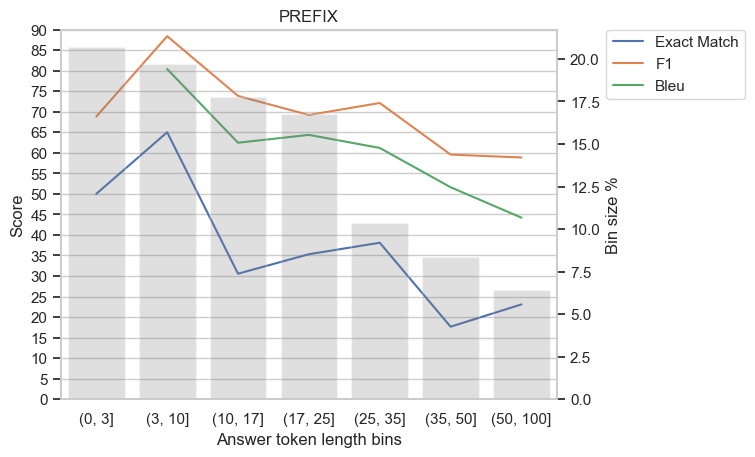

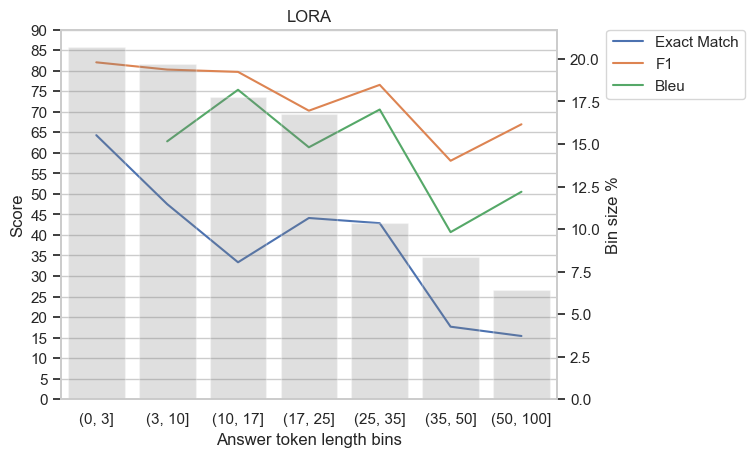

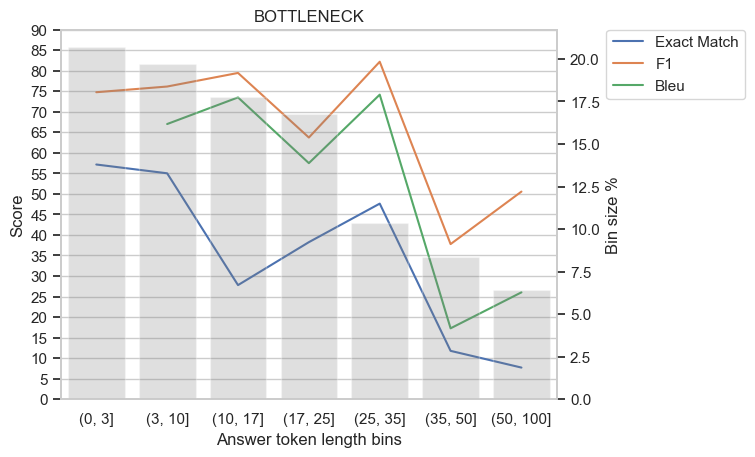

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bins = [
    {"label": "(0, 3]", "value": 42},
    {"label": "(3, 10]", "value": 40},
    {"label": "(10, 17]", "value": 36},
    {"label": "(17, 25]", "value": 34},
    {"label": "(25, 35]", "value": 21},
    {"label": "(35, 50]", "value": 17},
    {"label": "(50, 100]", "value": 13},
]
total = 0
for _bin in bins:
    total += _bin["value"]

for _bin in bins:
    _bin["ratio"] = _bin["value"] / total * 100

bin_df = pd.DataFrame(bins)
bin_df = bin_df.reset_index(drop=True)

# read from csv
def plot(name):
    df = pd.read_csv(f"{name}.csv")

    sns.set_theme(style="whitegrid")
    fig, ax = plt.subplots()
    ax.set_ylim(0, 90)
    ax.set_yticks(range(0, 91, 5))
    ax.grid(axis="x")
    sns.lineplot(x="label", y="em", data=df, ax=ax, legend=True, label="Exact Match")
    sns.lineplot(x="label", y="f1", data=df, ax=ax, legend=True, label="F1")
    sns.lineplot(x="label", y="bleu", data=df, ax=ax, legend=True, label="Bleu")
    ax.set(xlabel="Answer token length bins", ylabel="Score")
    plt.legend(bbox_to_anchor=(1.1, 1), loc="upper left", borderaxespad=0)

    # plot bar chart of bin size in the same figure
    ax2 = ax.twinx()
    sns.barplot(x="label", y="ratio", data=bin_df, ax=ax2, color="grey", alpha=0.25)
    ax2.set(ylabel="Bin size %")
    ax2.grid(False)

    plt.title(name.upper())

    plt.show()
    fig.savefig(f"./figs/{name}.png", bbox_inches="tight")


names = ["0shot", "ia3", "prefix", "lora", "bottleneck"]
for name in names:
    plot(name)